In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import GPy
from emukit.model_wrappers.gpy_model_wrappers import GPyModelWrapper
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement, NegativeLowerConfidenceBound, ProbabilityOfImprovement
from emukit.core.optimization import GradientAcquisitionOptimizer

from emukit.test_functions import forrester_function


from emukit.core.loop.user_function import UserFunctionWrapper
from emukit.core import ContinuousParameter, ParameterSpace
from GPy.models import GPRegression

LEGEND_SIZE = 15
function, space = forrester_function()

In [39]:
x_shift = 2

# def source_function(x):
#     return (6*(x+x_shift) - 2)**2 * np.sin(12*(x+x_shift) - 4)

def source_function(x):
    return np.sin(x*np.pi*2)

# def source_function(x):
#
#     return -(1.4 - 3.0 * x) * np.sin(18.0 * x)
#     # return (x-0.5) ** 2.0



X = np.array(np.random.rand(5,1))
Y = function(X)

maxiter = 10

In [40]:
# 建立模型
input_dim = 1

ker = GPy.kern.Matern52(input_dim = input_dim, ARD = True)#

# ker.lengthscale.constrain_bounded(0.01, 5) #lengthscale决定着点与点之间的相互作用程度
# ker.variance.constrain_bounded(1e-2, 10000.0) #方差

model_gpy = GPRegression(X,Y, ker)

# model_gpy.Gaussian_noise.variance =0.25
# model_gpy.Gaussian_noise.variance.fix()

model_gpy.randomize()
model_gpy.optimize_restarts(num_restarts=10,verbose =False, messages=False)

base_model_1 = GPyModelWrapper(model_gpy)

# gpy_model = GPy.models.GPRegression(X_init, Y_init, GPy.kern.RBF(1, lengthscale=0.08, variance=20), noise_var=1e-10)
# base_model_1 = GPyModelWrapper(gpy_model)

In [41]:
for i in range(maxiter):
    base_model_1.set_data(X, Y)
    # nlcb_acquisition = NegativeLowerConfidenceBound(base_model_1)
    #
    # optimizer = GradientAcquisitionOptimizer(space)
    # x_new, _ = optimizer.optimize(nlcb_acquisition)

    ei_acquisition = NegativeLowerConfidenceBound(base_model_1)
    optimizer = GradientAcquisitionOptimizer(space)
    x_new, _ = optimizer.optimize(ei_acquisition)

    y_new = function(x_new)

    X = np.append(X, x_new, axis=0)
    Y = np.append(Y, y_new, axis=0)

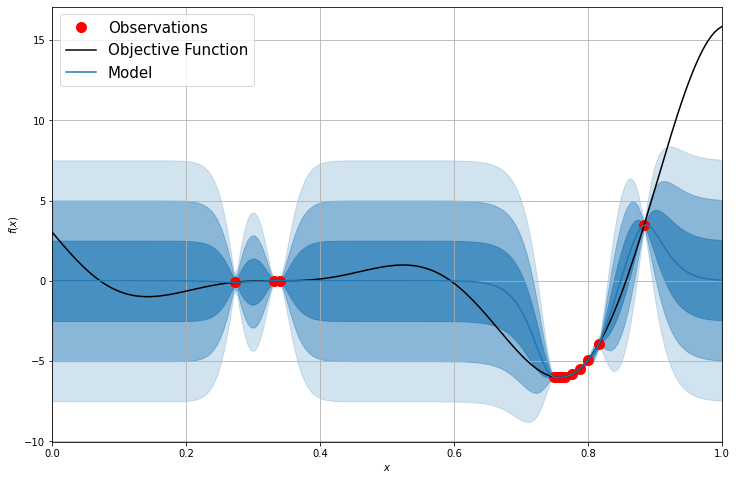

In [42]:

# In[26]:

x_plot_1 = np.linspace(0, 1, 200)[:, None]
y_plot_1 = function(x_plot_1)

mu_plo_1, var_plot_1 = base_model_1.predict(x_plot_1)

plt.figure(figsize=(12, 8))
plt.plot(base_model_1.X, base_model_1.Y, "ro", markersize=10, label="Observations")
plt.plot(x_plot_1, y_plot_1, "k", label="Objective Function")
plt.plot(x_plot_1, mu_plo_1, "C0", label="Model")
plt.fill_between(x_plot_1[:, 0],
                 mu_plo_1[:, 0] + np.sqrt(var_plot_1)[:, 0],
                 mu_plo_1[:, 0] - np.sqrt(var_plot_1)[:, 0], color="C0", alpha=0.6)
plt.fill_between(x_plot_1[:, 0],
                 mu_plo_1[:, 0] + 2 * np.sqrt(var_plot_1)[:, 0],
                 mu_plo_1[:, 0] - 2 * np.sqrt(var_plot_1)[:, 0], color="C0", alpha=0.4)
plt.fill_between(x_plot_1[:, 0],
                 mu_plo_1[:, 0] + 3 * np.sqrt(var_plot_1)[:, 0],
                 mu_plo_1[:, 0] - 3 * np.sqrt(var_plot_1)[:, 0], color="C0", alpha=0.2)
plt.legend(loc=2, prop={'size': LEGEND_SIZE})
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")

plt.grid(True)
plt.xlim(0, 1)
plt.show()

In [21]:
base_model_1 = base_model_1


import pickle

import os


# 定义文件夹路径
folder_path = 'base-models'

# 以下是保存模型和nlcb的部分，使用文件编号命名
# base_model_filename = os.path.join(folder_path, f'base_model_{x_shift}.pkl')
base_model_filename = os.path.join(folder_path, f'base_model_{x_shift}.pkl')

with open(base_model_filename, 'wb') as f:
    pickle.dump(base_model_1, f)


In [ ]:
list_point = np.array([x_plot_1, ei_acquisition_1_nom])
index = np.argmax(list_point[1])  # 通过获取函数对x plot 进行evaluate，找到最大的evaluate进行取点x new

x_new = list_point[0][index]
x_new = np.array([x_new])
print("argmax最终建议点:",x_new)

# In[28]:

optimizer = GradientAcquisitionOptimizer(space)
x_new_1, _ = optimizer.optimize(ei_acquisition_1) # 通过optimizer 取点

print("基础模型最终建议点:",x_new_1)

In [ ]:
# In[ ]:

plt.figure(figsize=(12, 8))

plt.plot( x_plot_1, ei_plot_1 , "purple", label="EI")


plt.legend(loc=1, prop={'size': LEGEND_SIZE})
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.grid(True)
plt.xlim(0, 1)
plt.show()